In [311]:
import csv
import math
import matplotlib.pyplot as plt

signals = [[], [], [], [], []]  # time, x, y, z, magnitude

with open('front_pocket_gates_walk.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    index = 0
    # Due to rounding errors, some seconds come out the same.
    # We take the first of the two measurements
    last_second = -1
    for line in reader:
        if not index == 0:
            nums = [float(x) for x in line]
            if not nums[0] == last_second:
                signals[0].append(nums[0])
                signals[1].append(nums[1])
                signals[2].append(nums[2])
                signals[3].append(nums[3])
                last_second = nums[0]
        index += 1
    print(len(signals[0]))

25840


In [306]:
index1, index2 = (800, 2600)

trace0 = go.Scatter(x=signals[0][index1:index2], y=signals[1][index1:index2])
trace1 = go.Scatter(x=signals[0][index1:index2], y=signals[2][index1:index2])
trace2 = go.Scatter(x=signals[0][index1:index2], y=signals[3][index1:index2])

fig = tools.make_subplots(rows=3, cols=1)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)

iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



3266


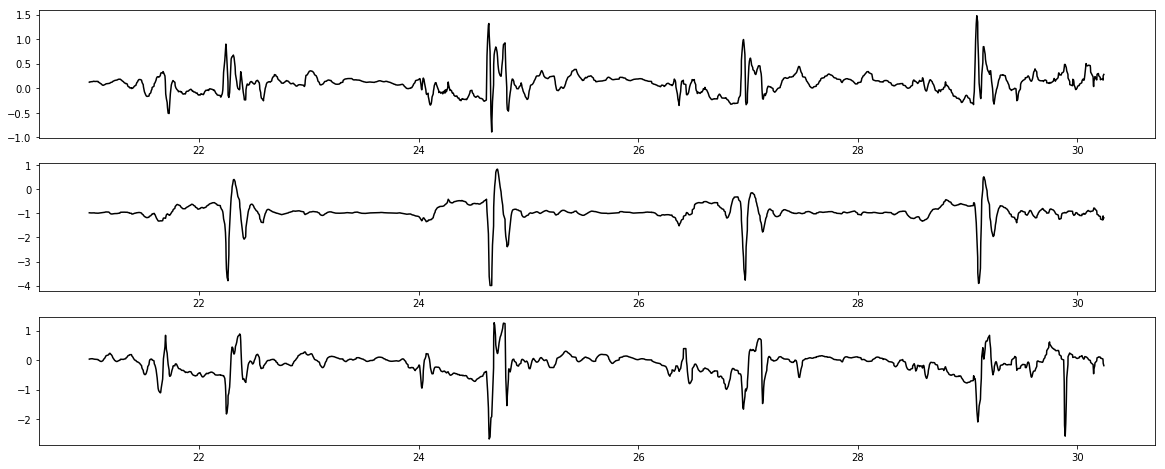

In [294]:
fig = plt.figure(figsize=(20, 8))
print(len(signals[0]))
index1, index2 = (800, 2600)
ax = fig.add_subplot(311)
ax.plot(signals[0][index1:index2], signals[1][index1:index2], 'k')
bx = fig.add_subplot(312)
bx.plot(signals[0][index1:index2], signals[2][index1:index2], 'k')
cx = fig.add_subplot(313)
cx.plot(signals[0][index1:index2], signals[3][index1:index2], 'k')
plt.show()

In [312]:
from scipy.interpolate import interp1d

start_index, end_index = (400, 25430)
#start_index, end_index = (800, 2600)

num_samples = int(200 * (signals[0][end_index] - signals[0][start_index]))

xnew = np.linspace(signals[0][start_index], signals[0][(end_index-1)], num=num_samples, endpoint=True)
interp1 = interp1d(np.array(signals[0][start_index:end_index]), np.array(signals[1][start_index:end_index]),
                  kind='linear')
interp2 = interp1d(np.array(signals[0][start_index:end_index]), np.array(signals[2][start_index:end_index]),
                  kind='linear')
interp3 = interp1d(np.array(signals[0][start_index:end_index]), np.array(signals[3][start_index:end_index]),
                  kind='linear')
i_signals = [xnew, interp1(xnew), interp2(xnew), interp3(xnew)]

In [313]:
from scipy.signal import butter, filtfilt, firwin, lfilter, argrelmin

def norm(x_list):
    return math.sqrt(sum(i**2 for i in x_list))

def lowpass_filter_butterworth(x_in, f_c=40, f_s=200, order=5):
    b, a = butter(order, f_c/ (0.5 * f_s), btype='low', analog=False)
    x_out = filtfilt(b, a, x_in)
    return x_out

#def lowpass_filter_fir(x_in, sample_rate, cutoff_f, trans_width=5.0, ripple_db=60.0):
#    nyq_rate = sample_rate / 2.0
#    width = trans_width / nyq_rate
#    N, beta = kaiserord(ripple_db, width)
#    
#    taps = firwin(N, cutoff_f / nyq_rate, window=('kaiser', beta))
#    x_out = lfilter(taps, 1.0, x_in)
#    return x_out

i_signals[1] = lowpass_filter_butterworth(i_signals[1], 40, 200, 5)
i_signals[2] = lowpass_filter_butterworth(i_signals[2], 40, 200, 5)
i_signals[3] = lowpass_filter_butterworth(i_signals[3], 40, 200, 5)
#filter_signal = lowpass_filter_fir(interp_signal, 200, 40)

norms = [norm([i_signals[1][i], i_signals[2][i], i_signals[3][i]]) for i in range(len(i_signals[0]))]
i_signals.append(norms)

filtered_norms = lowpass_filter_butterworth(norms, 3, 200, 5)

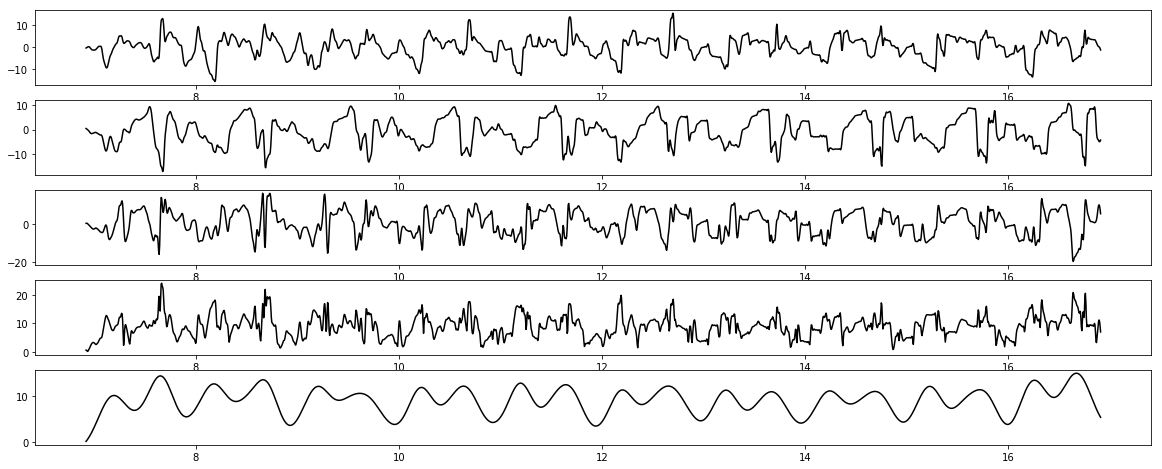

In [314]:
fig = plt.figure(figsize=(20, 8))
index1, index2 = (0, 2000)
ax = fig.add_subplot(511)
ax.plot(i_signals[0][index1:index2], i_signals[1][index1:index2], 'k')
bx = fig.add_subplot(512)
bx.plot(i_signals[0][index1:index2], i_signals[2][index1:index2], 'k')
cx = fig.add_subplot(513)
cx.plot(i_signals[0][index1:index2], i_signals[3][index1:index2], 'k')
dx = fig.add_subplot(514)
dx.plot(i_signals[0][index1:index2], i_signals[4][index1:index2], 'k')
ex = fig.add_subplot(515)
ex.plot(i_signals[0][index1:index2], filtered_norms[index1:index2], 'k')
plt.show()

In [315]:
mins = argrelmin(filtered_norms)
print(mins[0].shape)
print(mins)

(522,)
(array([   95,   198,   295,   402,   498,   608,   699,   802,   896,
        1004,  1095,  1211,  1303,  1409,  1506,  1610,  1705,  1816,
        1907,  2014,  2108,  2207,  2307,  2409,  2513,  2616,  2705,
        2815,  2896,  3002,  3093,  3193,  3285,  3394,  3491,  3593,
        3682,  3789,  3883,  3993,  4084,  4186,  4284,  4328,  4395,
        4481,  4591,  4688,  4789,  4885,  4992,  5084,  5186,  5285,
        5389,  5481,  5583,  5674,  5784,  5886,  5987,  6087,  6187,
        6293,  6396,  6505,  6601,  6696,  6790,  6901,  7000,  7094,
        7193,  7295,  7404,  7497,  7607,  7703,  7814,  7908,  8012,
        8103,  8205,  8312,  8418,  8512,  8612,  8715,  8816,  8913,
        9033,  9123,  9234,  9326,  9441,  9533,  9639,  9737,  9837,
        9950, 10046, 10147, 10254, 10349, 10468, 10552, 10661, 10750,
       10875, 10963, 11086, 11169, 11276, 11378, 11491, 11576, 11688,
       11781, 11902, 11993, 12101, 12197, 12309, 12401, 12501, 12604,
       12725